Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      

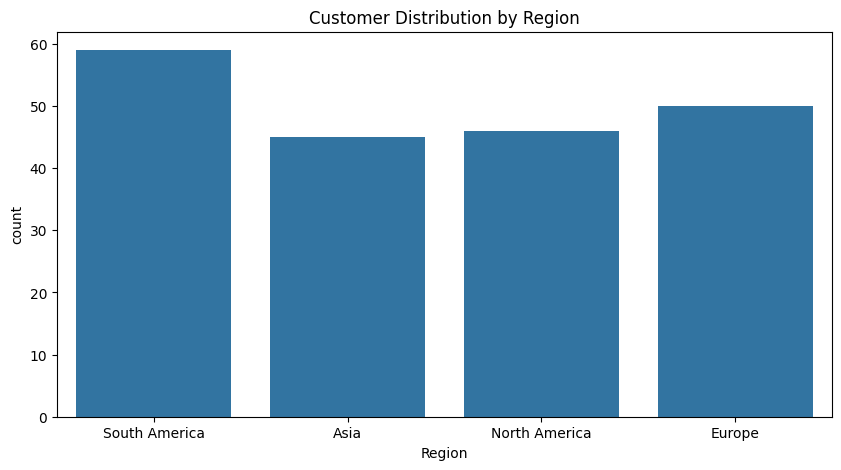

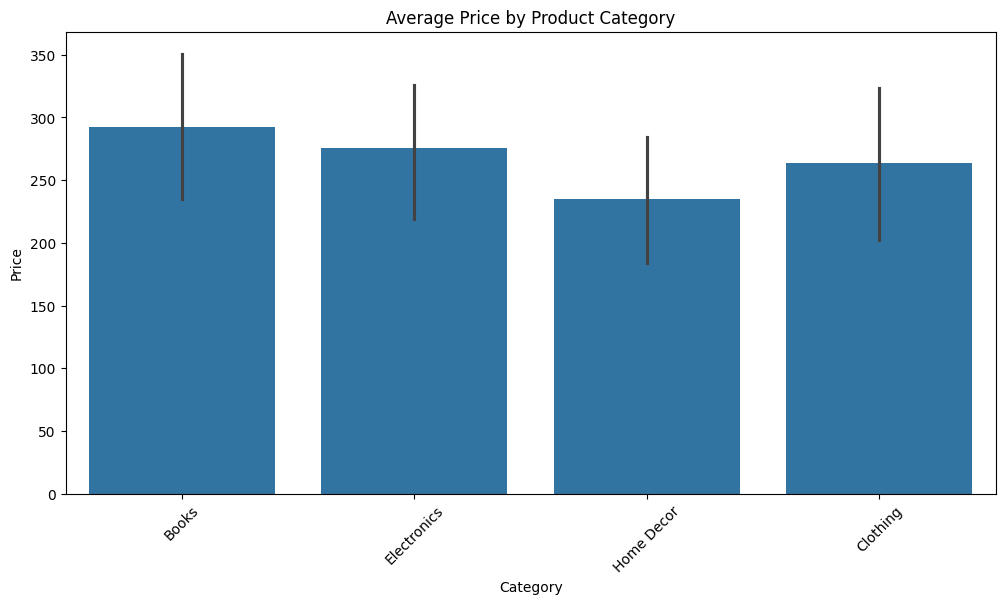

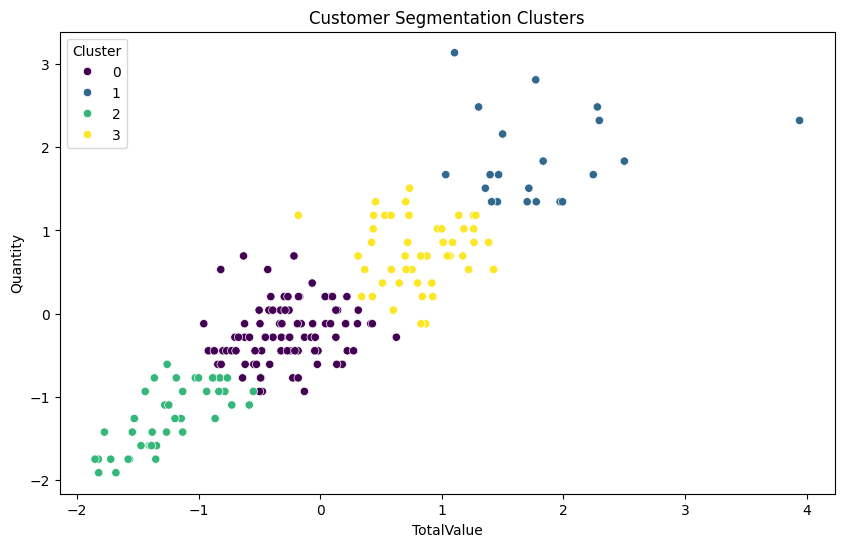

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
def load_data():
    customers = pd.read_csv("Customers.csv")
    products = pd.read_csv("Products.csv")
    transactions = pd.read_csv("Transactions.csv")
    return customers, products, transactions

def perform_eda(customers, products, transactions):
    print("Customers Data Info:")
    print(customers.info())
    print("Products Data Info:")
    print(products.info())
    print("Transactions Data Info:")
    print(transactions.info())
    
   
    print("Missing Values:")
    print(customers.isnull().sum(), products.isnull().sum(), transactions.isnull().sum())
    
   
    print("Descriptive Statistics:")
    print(transactions.describe())
    
    
    plt.figure(figsize=(10,5))
    sns.countplot(x='Region', data=customers)
    plt.title("Customer Distribution by Region")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Price', data=products, estimator=np.mean)
    plt.title("Average Price by Product Category")
    plt.xticks(rotation=45)
    plt.show()





In [14]:
def lookalike_model(customers, transactions):
    customer_txn_summary = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    
   
    scaler = StandardScaler()
    customer_txn_summary[['TotalValue', 'Quantity']] = scaler.fit_transform(customer_txn_summary[['TotalValue', 'Quantity']])
    
    
    similarity_matrix = cosine_similarity(customer_txn_summary[['TotalValue', 'Quantity']])
    
    lookalike_dict = {}
    customer_ids = customer_txn_summary['CustomerID'].values
    for i, customer in enumerate(customer_ids[:20]):
        similar_indices = np.argsort(similarity_matrix[i])[-4:-1][::-1]
        lookalike_dict[customer] = [(customer_ids[idx], similarity_matrix[i][idx]) for idx in similar_indices]
    
    lookalike_df = pd.DataFrame.from_dict(lookalike_dict, orient='index', columns=['Lookalike1', 'Lookalike2', 'Lookalike3'])
    lookalike_df.to_csv("FirstName_LastName_Lookalike.csv", index=True)

In [ ]:
def customer_segmentation(customers, transactions):
    customer_txn_summary = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    scaler = StandardScaler()
    customer_txn_summary[['TotalValue', 'Quantity']] = scaler.fit_transform(customer_txn_summary[['TotalValue', 'Quantity']])
    
  
    kmeans = KMeans(n_clusters=4, random_state=42)
    customer_txn_summary['Cluster'] = kmeans.fit_predict(customer_txn_summary[['TotalValue', 'Quantity']])
    
   
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=customer_txn_summary['TotalValue'], y=customer_txn_summary['Quantity'], hue=customer_txn_summary['Cluster'], palette='viridis')
    plt.title("Customer Segmentation Clusters")
    plt.show()
    
if __name__ == "__main__":
    customers, products, transactions = load_data()
    perform_eda(customers, products, transactions)
    lookalike_model(customers, transactions)
    customer_segmentation(customers, transactions)
